# Морфология 2
В данном ноутбуке находится задание на триграммы и словарь. В качестве текста будем использовать томик войны и мира: https://goo.gl/qcVTLE 

Для начала напомним некоторые полезные инструменты на питоне

## 1. Инструменты

### 1.1. Регулярные выражения
Исчерпывающий пост https://habr.com/ru/post/349860/

In [ ]:
import re

# С помощью рег. выражения можно искать, заменять и сентезировать строки по шаблонам
# Парочка простых примеров
numbers = re.findall(r'\d+', r'There is some numbers: 49 and 432')
print (u'Находим числа в строке: ', numbers)

print  (u'Простенький токенизатор: ', re.sub('[,\.?!]',' ','How, to? split. text!').split())

print (u'Еще один токенизатор: ', re.split(r'\W+', 'How, to? split. text! Again'))

# в качестве тренировки придумайте свой токенизатор в случае, когда из текста нужно получить только русские слова.

### 1.2. Чтение файлов
Чтобы не мучится самим с кодировками, приведем способ чтения файла корпуса.

In [ ]:
import io
wordlilist = None
text_file_path = 'wp.txt'
with io.open(text_file_path, "r", encoding='utf-16-le') as text_file:
    text = text_file.read()
    # wordlist = Здесь заиспользуем токенизатор. Также приведем все слова к нижнему регистру.

In [ ]:
with io.open('wp.txt', 'r') as text_file:
    text = text_file.read()
words = set(re.sub('[^а-яА-Я]', ' ', text).split())
words = set([word.lower() for word in words])

### 1.3. ООП
В питоне можно создавать свои классы, скорее всего нам понадобится класс для хранения бора

In [6]:
class Node:
    def __init__(self, char = '#'):
        '''
        Simple constructor without params
        '''
        self.char = char
        self.children = []
        self.is_finished = False

    
    def method(self, par):
        '''
        Simple method with one param
        '''
        pass
    
# все данные хранятся в self, поэтому он и передается первым аргументом во все методы

### 1.4. pyplot
Довольно часто приходится построить какие-нибудт графики и гистограммы для изучения данных, с которыми придется работать. Для этого в питоне есть удобнейший модуль для этого - pyplot. Туториал: https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

In [7]:
#!pip install matplotlib # Установка модуля
import matplotlib.pyplot as plt
# команда чтобы картинки рисовались прямо в ноутбуке
%matplotlib inline 

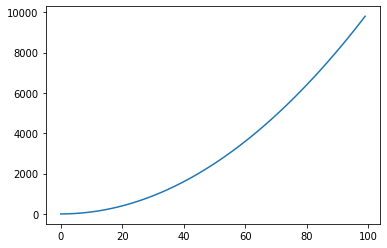

In [8]:
# Посмотрим на график функции x^2
data = [i * i for i in range(100)]
plt.plot(data)

(array([32., 13., 10.,  8.,  8.,  6.,  6.,  6.,  5.,  6.]),
 array([   0. ,  980.1, 1960.2, 2940.3, 3920.4, 4900.5, 5880.6, 6860.7,
        7840.8, 8820.9, 9801. ]),
 <a list of 10 Patch objects>)

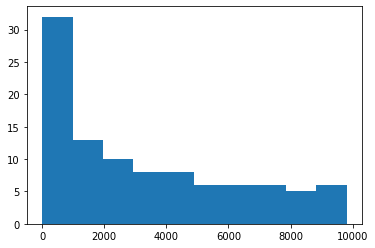

In [9]:
# и распределение по значениям
plt.hist(data)

Также полезная команда для подсчета времения выполнеия в ячейке

In [10]:
%%time
res = 0
for i in range(int(1e8)):
    res += 1

CPU times: user 8.68 s, sys: 0 ns, total: 8.68 s
Wall time: 8.68 s


## 2. Задание
Собственно теперь нам потребуется написать подсчет триграмм и бор для словаря, чтобы реализовать простенькую систему исправления ошибок.

### 2.1. Триграммы
Для начала получим словарь триграмма - её кол-во в тексте, не забывая о начале и конце слова.

Далее можно построить гистограмму на кол-во вхождений триграмм, и посмотреть самые частые и какая частота у каких-нибудь заведомо странных, например: 'чгк', 'шкя' и подобные. Из полученных данных придумать эвристику, как считать слово с опечаткой. Проверить эвристику по словарю.

In [11]:
def corpus_trigrams(word_list):
    '''returns trigrams count dictionary'''
    tri = {}
    
    for i in words:
        trig = '##' + i.lower() + '##'
        for i in range(len(trig) - 2):
            trigram = trig[i: i + 3]
            if trigram in tri:
                tri[trigram] += 1
            else:
                tri[trigram] = 1
    return tri

def is_error(word, trigrams):
    '''is the word with mistake'''
    trig = '##' + word.lower() + '##'
    misses = 0
    for k in range(len(trig) - 3):
#         return True
        trigram = trig[k: k + 3]
        if trigram not in trigrams:
            misses += 1
            continue

        if trigrams[trigram] < 6:
            misses += 1
       
    return misses >= 2


In [12]:
corpus_trigrams(words)

{'##я': 58,
 '#ян': 1,
 'янт': 4,
 'нта': 25,
 'тар': 91,
 'арь': 20,
 'рь#': 17,
 'ь##': 1876,
 '##н': 1270,
 '#не': 528,
 'нев': 89,
 'евы': 26,
 'выс': 109,
 'ысо': 35,
 'сок': 30,
 'око': 148,
 'кое': 61,
 'ое#': 308,
 'е##': 1915,
 '##т': 578,
 '#ту': 43,
 'тус': 3,
 'уск': 66,
 'скл': 28,
 'кло': 32,
 'ло#': 196,
 'о##': 1329,
 '##п': 3428,
 '#по': 1416,
 'пог': 43,
 'ого': 411,
 'гов': 114,
 'ово': 253,
 'вор': 190,
 'орю': 7,
 'рю#': 13,
 'ю##': 826,
 '##с': 2045,
 '#сп': 153,
 'спи': 32,
 'пин': 11,
 'инк': 19,
 'нку': 9,
 'ку#': 159,
 'у##': 851,
 '##а': 259,
 '#ан': 56,
 'ане': 44,
 'нет': 36,
 'ет#': 256,
 'т##': 620,
 '#со': 333,
 'сос': 70,
 'осе': 29,
 'сед': 35,
 'едн': 75,
 'дни': 58,
 'ний': 61,
 'ий#': 275,
 'й##': 1430,
 '##б': 796,
 '#бл': 102,
 'бле': 77,
 'лед': 70,
 'дне': 43,
 'нел': 38,
 'ела': 148,
 'ла#': 497,
 'а##': 1571,
 '#ст': 347,
 'сто': 276,
 'тол': 89,
 'оли': 63,
 'лиц': 31,
 'ицы': 20,
 'цы#': 31,
 'ы##': 505,
 '#на': 537,
 'нас': 86,
 'асл': 26,


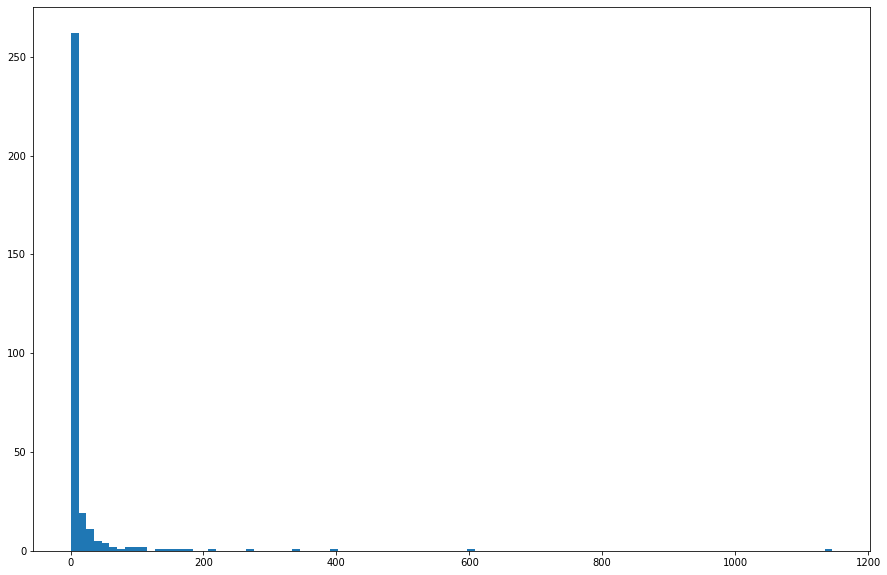

In [13]:
trigrams = corpus_trigrams(words)
histogram = {}

for key, value in trigrams.items():
    if value in histogram:
        histogram[value] += 1
    else:
        histogram[value] = 1

plt.figure(figsize=(15, 10))
plt.hist(histogram.values(), bins=100)
plt.show()


In [14]:
sorted(histogram.items(), key=lambda x: -x[1])[:10]

[(1, 1146),
 (2, 599),
 (3, 396),
 (4, 344),
 (5, 265),
 (6, 218),
 (8, 183),
 (7, 164),
 (9, 156),
 (10, 139)]

In [15]:
is_error('кто', trigrams)

False

### 2.2. Бор
Далее построим бор, с помощью которого будем искать исправления опечатки в слове. Пока только в случае замены и удаления в конце (Если есть желание, то можно и для всех случаев). Также сравнить по времени с поиском в случае замены в исходном слове последних двух символов и поиске в словаре.

In [16]:
from collections import Counter

In [17]:
from nltk.metrics.distance import edit_distance

In [33]:
words_uni = []
for word in words:
    if word in words_uni:
        continue
    else:
        words_uni.append(word)
print(len(words_uni))
print(len(words))

19227
19227


In [44]:
def correct_word(word, dictionary):
    '''returns most similar word from dictionary'''
    distances = [(candidate, edit_distance(word.lower(), candidate)) for candidate in dictionary]
    min_distance = sorted(distances, key=lambda x: x[1])[0][1]

    candidates = [word[0] for word in distances if word[1] == min_distance]

    return '<{}>: [{}]'.format(word, '|'.join(candidates))
            
    
def correct_word_naive(word, dictionary):
    '''correct word using generation'''
    w = []
    newwords = []
    letters = 'ёйцукенгшщзхъфывапролджэячсмитьбю'
    let = []
    tmp = []
    nwords = []
    for l in letters:
        let.append(l)

    for letter in word:
        w.append(letter)
        tmp.append(letter)
#     print(w)
    # print(len(let))
    for j in range (len(let)):
        for i in range (len(tmp)):
            tmp[i] = let[j]
            tmpl = ''.join(tmp)
            newwords.append(tmpl)
            tmp[i] = w[i]
    w1 = []
    tmp1 = []
    newwords1 = []
    neww = []
    for k in newwords:
        w1 = []
        tmp1 = []
        for letter in k:
            w1.append(letter)
            tmp1.append(letter)
    #     print(w1)
        for j in range (len(let)):
            for i in range (len(tmp1)):
                tmp1[i] = let[j]
                tmpl = ''.join(tmp1)
                for wo in words:
                    if tmpl == wo:
                        neww.append(tmpl)
                newwords1.append(tmpl)
                tmp1[i] = w1[i]
    neww = set([word.lower() for word in neww])
    candidates = list(neww)
    return '<{}>: [{}]'.format(word, '|'.join(candidates))
    

In [46]:
print(correct_word('коровя', words))
print(correct_word_naive('коровя', words))

<коровя>: [корова|короля]
['к', 'о', 'р', 'о', 'в', 'я']
<коровя>: [корова|короны|корону|королю|король|короче|короне|короба|короля]


### 2.3 Все вместе
Теперь соберем поиск и исправление опечаток в одну систему, которая будет принимать текст и править его. Также замерим скорость по сравнению с "менее наивным подходом".

In [50]:
def correct_mistakes(text, dictionary):
    '''returns corrected text'''
    clean = []

    for word in text.split():
        # Problems with bad parsing
        if len(word) > 1 and word[-1] in punctuation:
            word, punct = word[:-1], word[-1]
        else:
            word, punct = word, None

        if not is_error(word, trigrams):
            if punct:
                word += punct
            clean.append(word)
            continue

        correction = correct_word(word, dictionary)
        if punct:
            correction += punct
        clean.append(correction)

    return ' '.join(clean)

def correct_mistakes_naive(text, dictionary):
    '''returns corrected text using generation'''
    clean = []

    for word in text.split():
        # Problems with bad parsing
        if len(word) > 1 and word[-1] in punctuation:
            word, punct = word[:-1], word[-1]
        else:
            word, punct = word, None

        if not is_error(word, trigrams):
            if punct:
                word += punct
            clean.append(word)
            continue

        correction = correct_word_naive(word, dictionary)
        if punct:
            correction += punct
        clean.append(correction)

    return ' '.join(clean)

In [51]:
with open('wp.txt', 'r') as file:
    text = file.read().replace('\n', ' ')

# Generate some mistakes
text = text.replace('ов', 'св')

In [53]:

import io
import re

from string import punctuation

In [54]:
%%time
correct_mistakes(text, words)

CPU times: user 5h 3min 1s, sys: 1.76 s, total: 5h 3min 3s
Wall time: 5h 26min 2s


In [ ]:
%%time
correct_mistakes_naive(text, words)

['1']
['I']
['–']
['Е', 'h']
['b', 'i', 'e', 'n']
['m', 'o', 'n']
['p', 'r', 'i', 'n', 'c', 'e']
['G', 'e', 'n', 'e', 's']
['e', 't']
['L', 'u', 'c', 'q', 'u', 'e', 's']
['n', 'e']
['s', 'o', 'n', 't']
['p', 'l', 'u', 's']
['q', 'u', 'e']
['d', 'e', 's']
['a', 'p', 'a', 'n', 'a', 'g', 'e', 's']
['d', 'e', 's']
['d', 'e']
['l', 'a']
['f', 'a', 'm', 'i', 'l', 'l', 'e']
['B', 'u', 'o', 'n', 'a', 'p', 'a', 'r', 't', 'e']
['N', 'o', 'n']
['j', 'e']
['v', 'o', 'u', 's']
['p', 'r', 'e', 'v', 'i', 'e', 'n', 's']
['q', 'u', 'e']
['s', 'i']
['v', 'o', 'u', 's']
['n', 'e']
['m', 'e']
['d', 'i', 't', 'e', 's']
['p', 'a', 's']
['q', 'u', 'e']
['n', 'o', 'u', 's']
['a', 'v', 'o', 'n', 's']
['l', 'a']
['g', 'u', 'e', 'r', 'r', 'e']
['s', 'i']
['v', 'o', 'u', 's']
['v', 'o', 'u', 's']
['p', 'e', 'r', 'm', 'e', 't', 't', 'e', 'z']
['e', 'n', 'c', 'o', 'r', 'e']
['d', 'e']
['p', 'a', 'l', 'l', 'i', 'e', 'r']
['t', 'o', 'u', 't', 'e', 's']
['l', 'e', 's']
['i', 'n', 'f', 'a', 'm', 'i', 'e', 's']
['t', 'o